# Data Analysis and Visualization for CTU-13

### Imports

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

### Load Dataset

In [64]:
data_path = "../data/processed/merged_network_traffic.csv"

data = pd.read_csv(data_path)
data = data.dropna()

# OVERFITTING_COLUMNS = {
#     "dst_ip",
#     "dst_mac",
#     "dst_oui",
#     "src_ip",
#     "src_mac",
#     "src_oui",
#     "id",
# }

# data = data.drop(columns=OVERFITTING_COLUMNS)
# # SAve csv
# data.to_csv("../data/processed/merged_network_traffic_cleaned.csv", index=False)

### Display basic information about the dataset


In [65]:
print("Dataset Information:")
display(data.info())
print("\nSample of the data:")
display(data.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586175 entries, 0 to 586174
Data columns (total 63 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Label                         586175 non-null  int64  
 1   application_category_name     586175 non-null  object 
 2   application_confidence        586175 non-null  float64
 3   application_is_guessed        586175 non-null  float64
 4   application_name              586175 non-null  object 
 5   bidirectional_ack_packets     586175 non-null  int64  
 6   bidirectional_bytes           586175 non-null  int64  
 7   bidirectional_duration_ms     586175 non-null  int64  
 8   bidirectional_fin_packets     586175 non-null  float64
 9   bidirectional_first_seen_ms   586175 non-null  int64  
 10  bidirectional_last_seen_ms    586175 non-null  int64  
 11  bidirectional_max_piat_ms     586175 non-null  int64  
 12  bidirectional_max_ps   

None


Sample of the data:


,Label,application_category_name,application_confidence,application_is_guessed,application_name,bidirectional_ack_packets,bidirectional_bytes,bidirectional_duration_ms,bidirectional_fin_packets,bidirectional_first_seen_ms,...,src2dst_mean_ps,src2dst_min_piat_ms,src2dst_min_ps,src2dst_packets,src2dst_psh_packets,src2dst_rst_packets,src2dst_stddev_piat_ms,src2dst_stddev_ps,src2dst_syn_packets,src_port
0,0,Network,6.0,0.0,ICMPV6,0,78,0,0.0,40491,...,78.0,0,78,1,0,0,0.000000,0.0,0,0
1,0,Network,6.0,0.0,DHCP,0,1770,8488,0.0,50050,...,590.0,3492,590,3,0,0,1063.488599,0.0,0,67
2,0,Network,6.0,0.0,ICMPV6,0,180,499,0.0,40492,...,90.0,499,90,2,0,0,0.000000,0.0,0,0
3,0,Network,6.0,0.0,DNS.Microsoft,0,585,53,0.0,61143,...,76.0,0,76,1,0,0,0.000000,0.0,0,50232
4,0,Network,6.0,0.0,DNS,0,533,51,0.0,65110,...,86.0,0,86,1,0,0,0.000000,0.0,0,54830


### Missing values analysis

In [66]:
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(
    missing_values[missing_values > 0]
    if any(missing_values > 0)
    else "No missing values found"
)


Missing Values:
No missing values found


## Exploratory Data Analysis

### Distribution of traffic

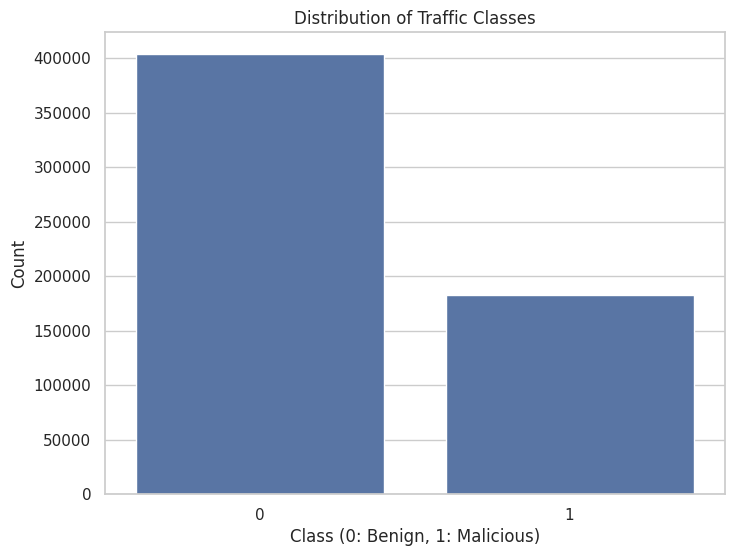

In [67]:
plt.figure(figsize=(8, 6))
class_counts = data["Label"].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Distribution of Traffic Classes")
plt.xlabel("Class (0: Benign, 1: Malicious)")
plt.ylabel("Count")
plt.show()

In [68]:
print("\nClass Distribution:")
print(class_counts)
print(
    f"\nClass balance ratio (Benign/Malicious): {class_counts[0]/class_counts[1]:.2f}"
)


Class Distribution:
Label
0    403625
1    182550
Name: count, dtype: int64

Class balance ratio (Benign/Malicious): 2.21


### Correlation Analysis

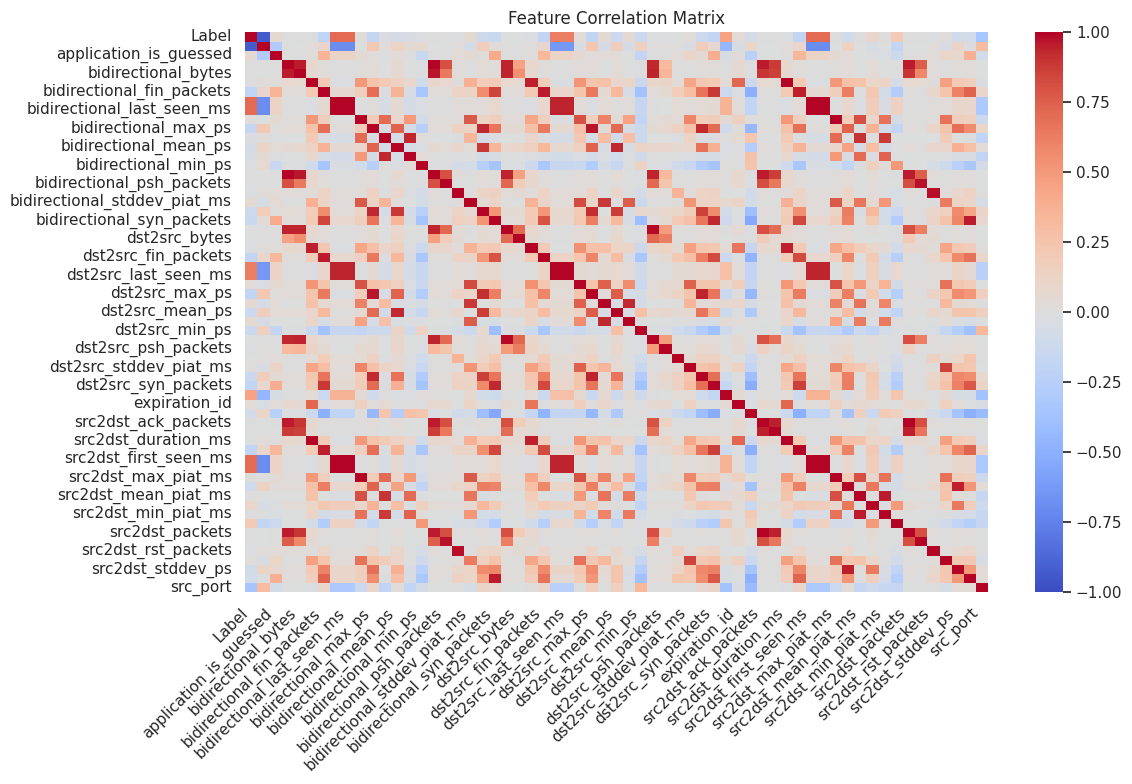

In [69]:
# Select numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=["float64", "int64"]).columns
correlation_matrix = data[numeric_columns].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1, center=0, annot=False)
plt.title("Feature Correlation Matrix")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Feature importance based on variance

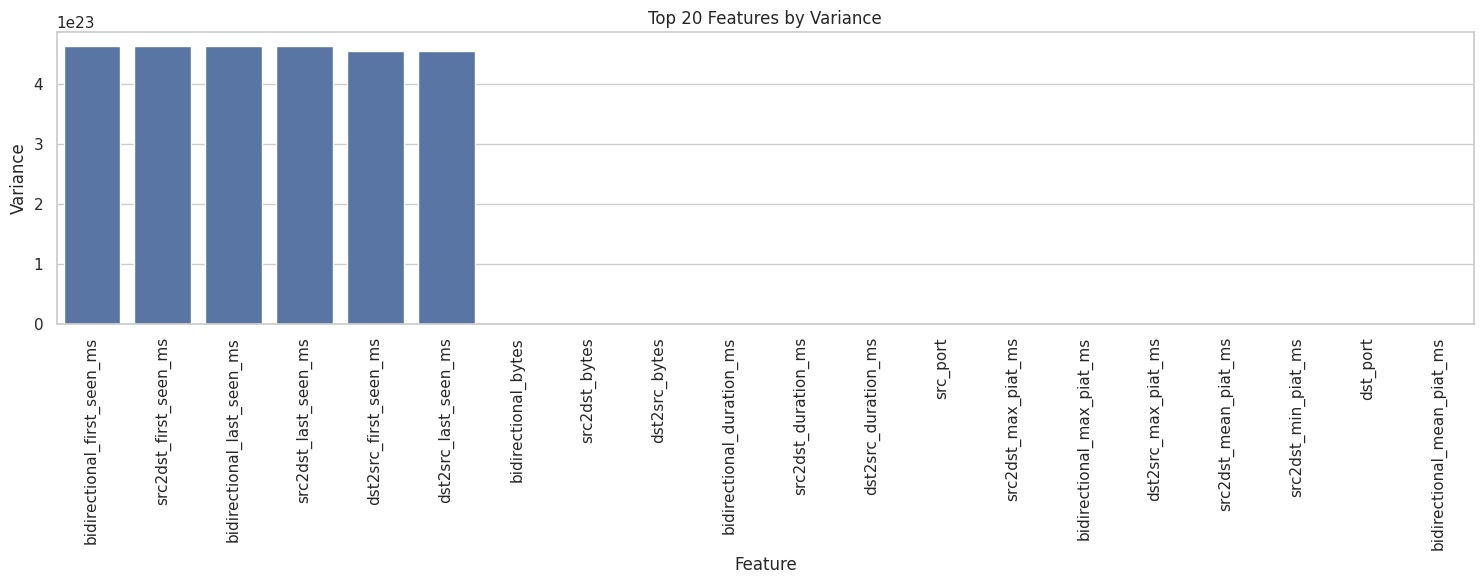

In [70]:
# Analyze feature variance
numeric_cols = data.select_dtypes(include=[np.number]).columns
numeric_data = data[numeric_cols].drop("Label", axis=1)

feature_variance = pd.DataFrame(
    {"Feature": numeric_cols, "Variance": data[numeric_cols].var()}
).sort_values("Variance", ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(x="Feature", y="Variance", data=feature_variance.head(20))
plt.title("Top 20 Features by Variance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### PCA Analysis

In [71]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Prepare numeric data for PCA


In [72]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

#### Perform PCA


In [73]:

pca = PCA()
pca_result = pca.fit_transform(scaled_data)

#### PCA Visualization

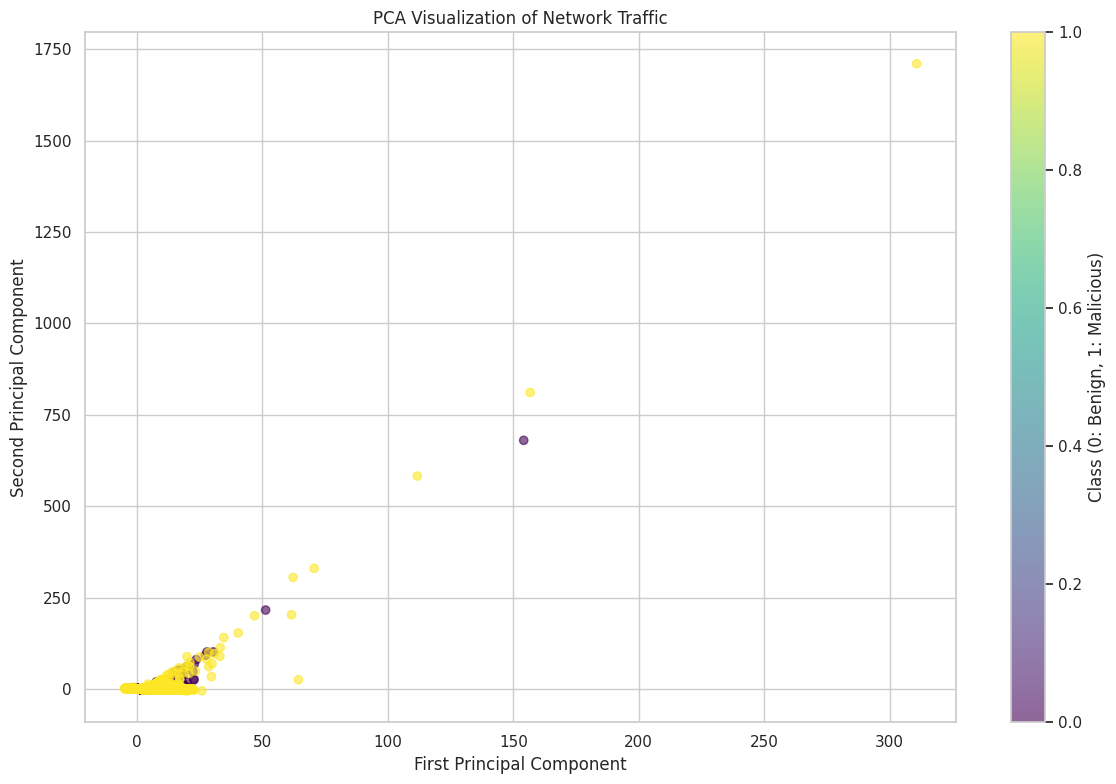

In [74]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    pca_result[:, 0], pca_result[:, 1], c=data["Label"], cmap="viridis", alpha=0.6
)
plt.colorbar(label="Class (0: Benign, 1: Malicious)")
plt.title("PCA Visualization of Network Traffic")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.tight_layout()
plt.show()


#### Explained Variance Analysis

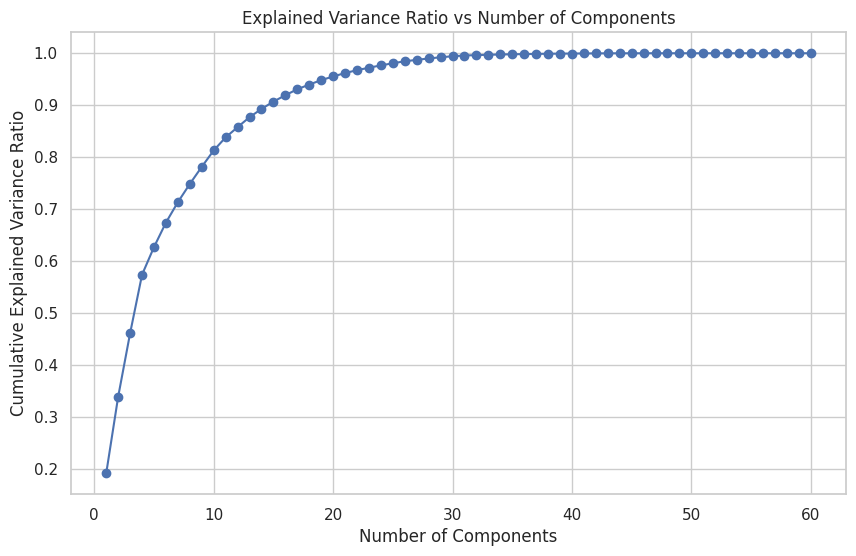


Explained variance ratio by component:
Component 1: 0.192 (19.2%)
Component 2: 0.147 (14.7%)
Component 3: 0.122 (12.2%)
Component 4: 0.113 (11.3%)
Component 5: 0.053 (5.3%)
Component 6: 0.047 (4.7%)
Component 7: 0.039 (3.9%)
Component 8: 0.035 (3.5%)
Component 9: 0.033 (3.3%)
Component 10: 0.032 (3.2%)


In [75]:
# Analyze explained variance
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(explained_variance_ratio) + 1),
    np.cumsum(explained_variance_ratio),
    "bo-",
)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Explained Variance Ratio vs Number of Components")
plt.grid(True)
plt.show()

print("\nExplained variance ratio by component:")
for i, var in enumerate(explained_variance_ratio[:10]):
    print(f"Component {i+1}: {var:.3f} ({var*100:.1f}%)")

#### Feature Contribution Analysis


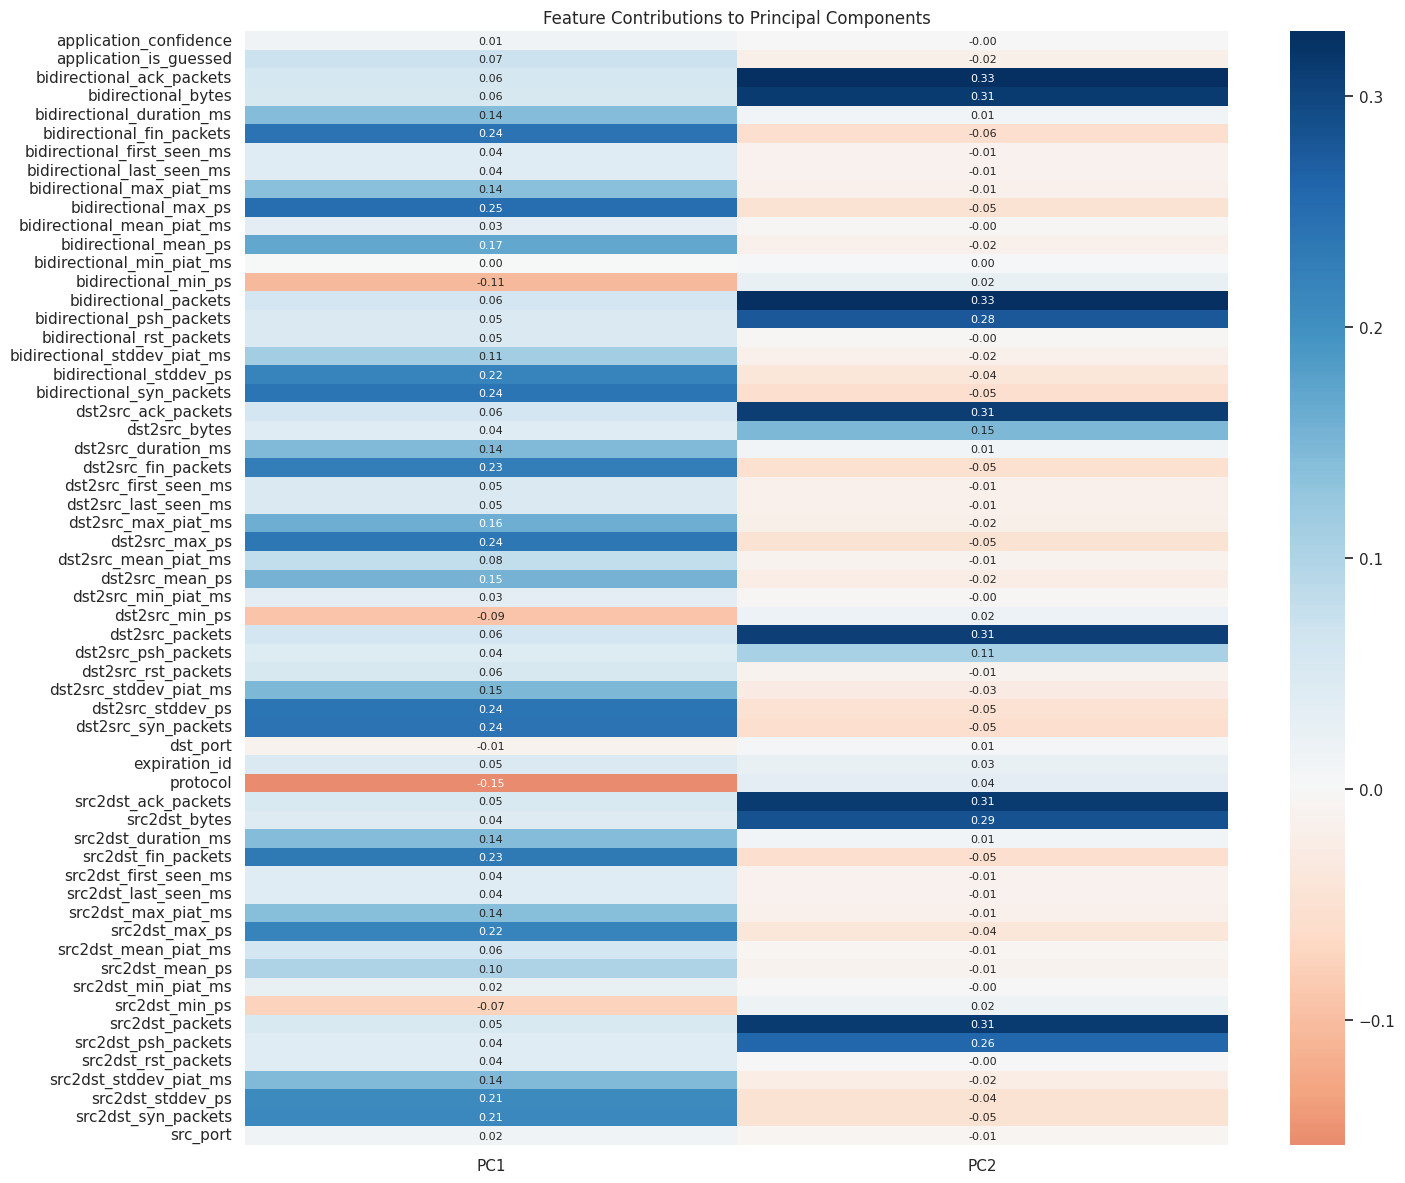


Top 10 contributing features to each principal component:

PC1:
bidirectional_max_ps: 0.249
dst2src_syn_packets: 0.242
bidirectional_fin_packets: 0.241
bidirectional_syn_packets: 0.238
dst2src_stddev_ps: 0.238
dst2src_max_ps: 0.236
src2dst_fin_packets: 0.234
dst2src_fin_packets: 0.227
src2dst_max_ps: 0.220
bidirectional_stddev_ps: 0.219

PC2:
bidirectional_packets: 0.328
bidirectional_ack_packets: 0.328
src2dst_packets: 0.314
src2dst_ack_packets: 0.314
bidirectional_bytes: 0.314
dst2src_ack_packets: 0.309
dst2src_packets: 0.309
src2dst_bytes: 0.286
bidirectional_psh_packets: 0.277
src2dst_psh_packets: 0.260


In [76]:
# Feature importance analysis
loadings = pd.DataFrame(
    pca.components_[:2].T, columns=["PC1", "PC2"], index=numeric_data.columns
)

plt.figure(figsize=(15, 12))
sns.heatmap(
    loadings,
    cmap="RdBu",
    center=0,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8},
    yticklabels=loadings.index,
    xticklabels=["PC1", "PC2"],
)
plt.title("Feature Contributions to Principal Components")
plt.tight_layout()
plt.show()

# Print top contributing features
print("\nTop 10 contributing features to each principal component:")
for pc in ["PC1", "PC2"]:
    print(f"\n{pc}:")
    top_features = loadings[pc].abs().sort_values(ascending=False)[:10]
    for feat, contrib in top_features.items():
        print(f"{feat}: {contrib:.3f}")

#### Outlier Analysis



Outlier Analysis:
Number of potential outliers (>99th percentile): 5862


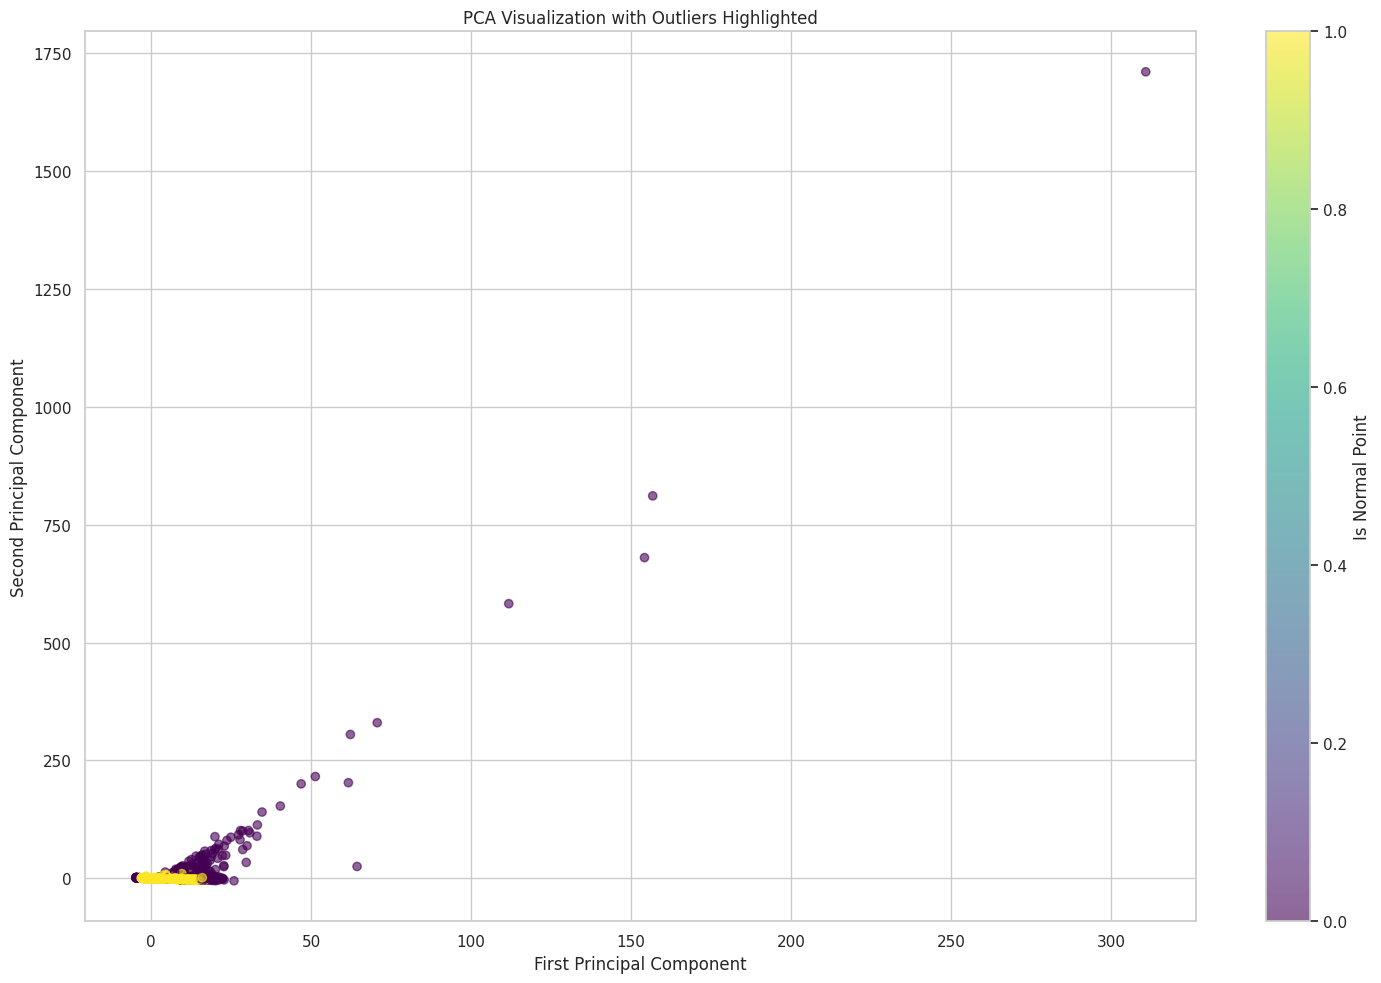

In [77]:
distances = np.sqrt(np.sum(pca_result**2, axis=1))
threshold = np.percentile(distances, 99)

print("\nOutlier Analysis:")
print(f"Number of potential outliers (>99th percentile): "
      f"{sum(distances > threshold)}")

# Plot with outliers highlighted
plt.figure(figsize=(15, 10))
plt.scatter(pca_result[:, 0], pca_result[:, 1],
           c=distances <= threshold, cmap='viridis', alpha=0.6)
plt.colorbar(label='Is Normal Point')
plt.title('PCA Visualization with Outliers Highlighted')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.tight_layout()
plt.show()

### Box plots for key features by attack type

In [78]:
# Statistical summary by class

features = numeric_data.columns

print("\nStatistical Summary by Class:")
# for feature in numeric_data.columns[:10]:  # Limit to first 10 features for brevity
for feature in features:
    print(f"\n{feature} Summary:")
    print(data.groupby("Label")[feature].describe())



Statistical Summary by Class:

application_confidence Summary:
          count      mean       std  min  25%  50%  75%  max
Label                                                       
0      403625.0  5.716180  1.156951  0.0  6.0  6.0  6.0  6.0
1      182550.0  0.166672  0.719739  0.0  0.0  0.0  0.0  6.0

application_is_guessed Summary:
          count      mean       std  min  25%  50%  75%  max
Label                                                       
0      403625.0  0.056728  0.231323  0.0  0.0  0.0  0.0  1.0
1      182550.0  0.090846  0.287391  0.0  0.0  0.0  0.0  1.0

bidirectional_ack_packets Summary:
          count       mean          std  min  25%  50%   75%       max
Label                                                                 
0      403625.0  22.523469   506.984342  0.0  0.0  0.0  11.0  275465.0
1      182550.0  22.806431  2043.955444  0.0  0.0  0.0   0.0  695900.0

bidirectional_bytes Summary:
          count          mean           std   min    25%    50%  